# Text Classification with IMDB Movie's description

<center><img src="./img/homepage.png" style="max-height: 400px; max-width: auto;"/></center>

## IMDB Web Scraping

For more information please open 

## Data Preprocessing

### Read CSV File

In [ ]:
import numpy as np
import pandas as pd

In [2]:
import csv

In [3]:
lines = []
with open('movie_corpus.csv') as f:
    reader = csv.DictReader(f, delimiter='|')
    lines = [dict(r) for r in reader]

In [4]:
dataset = []
for l in lines:
    if len(l['vote']):
        l['vote'] = None
    elif ',' in l['vote']:
        l['vote'] = l['vote'].replace(',', '')
        
    dataset.append(l)

In [5]:
movie_corpus = pd.DataFrame(dataset)

### Extract movie's genre

In [6]:
def movie_genre_extraction(corpus):

    movie_genre = sorted(list(set([genre.strip() 
                  for genres in corpus['genre'].tolist()
                  for genre in genres.split(', ')])))
    
    return [k for k in movie_genre if len(k)]

def update_for_genre(genre, corpus):
    for genre in movie_genre:
        corpus[genre] = corpus['genre'].apply(
            lambda x: 1 if genre in x else 0
        )
    
    return corpus

def text_to_float(g):
    
    gross = 0

    if 'float' == type(g).__name__:
        gross = g
        print(gross)
    else:
        gross = float(g.lower().replace('$', '').replace('m', ''))
        
    return gross

def covert_gross(corpus):
    return corpus['gross'][~corpus['gross'].isnull()].apply(text_to_float)

In [7]:
movie_genre = movie_genre_extraction(movie_corpus)
movie_corpus = update_for_genre(movie_genre, movie_corpus)

In [8]:
movie_genre

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [9]:
movie_corpus.head()

,title,year,movie_rate,runtime,genre,rating,metascore,description,directors,starts,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Gladiator,2000,R,155,"Action, Adventure, Drama",8.5,67,A former Roman General sets out to exact venge...,Ridley Scott,Russell Crowe+Joaquin Phoenix+Connie Nielsen+O...,...,0,0,0,0,0,0,0,0,0,0
1,Memento,2000,R,113,"Mystery, Thriller",8.4,80,A man with short-term memory loss attempts to ...,Christopher Nolan,Guy Pearce+Carrie-Anne Moss+Joe Pantoliano+Mar...,...,0,0,0,0,0,0,0,1,0,0
2,Snatch,2000,R,104,"Comedy, Crime",8.3,0,"Unscrupulous boxing promoters, violent bookmak...",Guy Ritchie,Jason Statham+Brad Pitt+Stephen Graham+Vinnie ...,...,0,0,0,0,0,0,0,0,0,0
3,Requiem for a Dream,2000,R,102,Drama,8.3,68,The drug-induced utopias of four Coney Island ...,Darren Aronofsky,Ellen Burstyn+Jared Leto+Jennifer Connelly+Mar...,...,0,0,0,0,0,0,0,0,0,0
4,X-Men,2000,PG-13,104,"Action, Adventure, Sci-Fi",7.4,64,In a world where mutants (evolved super-powere...,Bryan Singer,Patrick Stewart+Hugh Jackman+Ian McKellen+Famk...,...,0,0,0,1,0,0,0,0,0,0


In [10]:
movie_corpus[['gross']]

,gross
0,187.71
1,25.54
2,30.33
3,3.64
4,157.30
...,...
88044,
88045,
88046,
88047,


### Store processed data into csv

In [ ]:
movie_corpus.to_csv('imdb_movie_corpus.csv', sep='|')

### Shortcut + Refresh

In [ ]:
if 'movie_corpus' not in dir():
    import pandas as pd
    
    movie_corpus = pd.read_csv('imdb_movie_corpus.csv', sep='|')
    movie_genre = movie_genre_extraction(movie_corpus)

### EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
movie_genre_count = movie_corpus[movie_genre].T.sum(axis=1).reset_index()
movie_genre_count.set_index('index', inplace=True)
movie_genre_count['count'] = movie_genre_count[0]
del movie_genre_count[0]

movie_genre_count = movie_genre_count.T
movie_genre_count

index,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
count,5214,1,4678,5278,950,18328,4082,9129,26719,8383,...,6051,2311,9965,1048,6767,2020,7782,1061,172,45


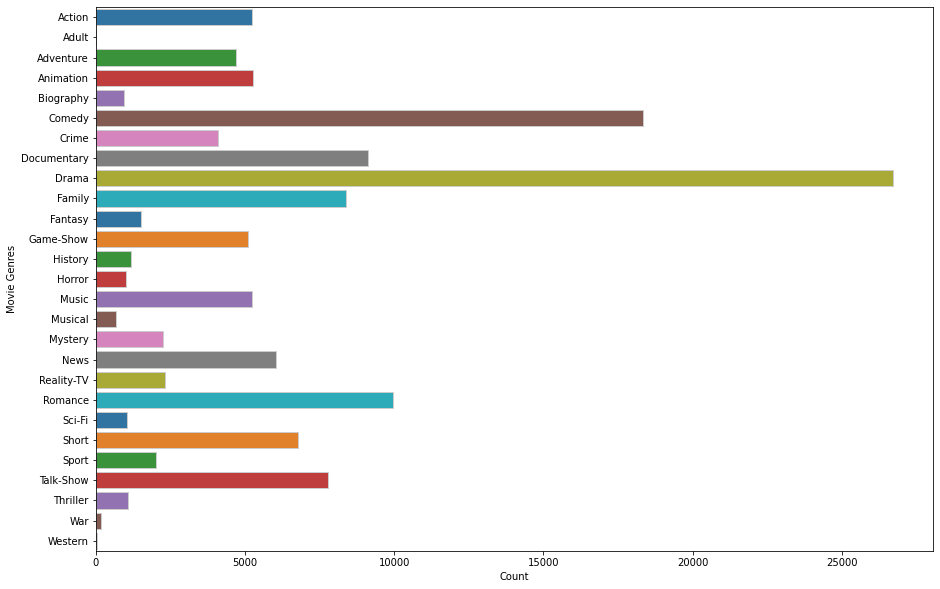

In [13]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(
    palette=sns.color_palette(), 
    edgecolor='.8', 
    data=movie_genre_count,
    orient='h'
)
ax.set(xlabel='Count', ylabel='Movie Genres')


plt.show()

## Text Analytics

In [14]:
import nltk
from nltk.corpus import stopwords

### Download stopwords (Required at first run)

In [ ]:
import ssl

In [ ]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

Dialog below will be shown after cell aboved was executed. All downloaded resource store in `~/nltk_data`

<center><img src="./img/nltk-package.png" /></center>

<center><img src="./img/nltk-package-downloaded.png" /></center>

In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### NLP Example

Objective: We need to tokenized movies description we collected from IMDB with task

- [ ] Remove all special characters such as `,`, `.` or `;` even numbers from description
- [ ] Tokenize movie description
- [ ] Count tokens' frequency
- [ ] Convert to lower characters
- [ ] Remove stop words

### Experiment process

In [16]:
# Example
movie_corpus.description[0]

'A former Roman General sets out to exact vengeance against the corrupt emperor who murdered his family and sent him into slavery.'

In [17]:
import re

In [18]:
sentence = re.sub('[^A-Za-z ]+', '', movie_corpus.description[0].lower())
sentence

'a former roman general sets out to exact vengeance against the corrupt emperor who murdered his family and sent him into slavery'

In [19]:
tokenized = sentence.split()
tokenized

['a',
 'former',
 'roman',
 'general',
 'sets',
 'out',
 'to',
 'exact',
 'vengeance',
 'against',
 'the',
 'corrupt',
 'emperor',
 'who',
 'murdered',
 'his',
 'family',
 'and',
 'sent',
 'him',
 'into',
 'slavery']

In [20]:
from collections import Counter

In [21]:
tf = Counter(tokenized)
tf

Counter({'a': 1,
         'former': 1,
         'roman': 1,
         'general': 1,
         'sets': 1,
         'out': 1,
         'to': 1,
         'exact': 1,
         'vengeance': 1,
         'against': 1,
         'the': 1,
         'corrupt': 1,
         'emperor': 1,
         'who': 1,
         'murdered': 1,
         'his': 1,
         'family': 1,
         'and': 1,
         'sent': 1,
         'him': 1,
         'into': 1,
         'slavery': 1})

In [22]:
tokenized_set = set(tokenized)
tokenized_set

{'a',
 'against',
 'and',
 'corrupt',
 'emperor',
 'exact',
 'family',
 'former',
 'general',
 'him',
 'his',
 'into',
 'murdered',
 'out',
 'roman',
 'sent',
 'sets',
 'slavery',
 'the',
 'to',
 'vengeance',
 'who'}

### Remove all stopwords

In [23]:
english_stopwords = frozenset(stopwords.words('english'))

In [24]:
remaining = tokenized_set - english_stopwords
remaining

{'corrupt',
 'emperor',
 'exact',
 'family',
 'former',
 'general',
 'murdered',
 'roman',
 'sent',
 'sets',
 'slavery',
 'vengeance'}

In [ ]:
class classification(object):
    def __init__(self, f):
        self.f = f
        
    def __call__(self):
        self.f()

In [ ]:
def text_tokenize(description) -> str:
    import re
    return re.sub('[^A-Za-z ]+', '', description.lower())

def counting(description, stopwords=None):
    if None == stopwords:
        from nltk import stopwords
        stopwords = frozenset(stopwords.words('english'))